## Digit Image clustering using KMean and t-SNE transformation

Generic imports.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

Lets have peek into the image data.

In [3]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)
print(digits.target)
print(digits.target_names)

(1797, 64)
[0 1 2 ..., 8 9 8]
[0 1 2 3 4 5 6 7 8 9]


We see above that total of 1797 images of size 8\*8.

Targets are labeled as 0-9 and target names are also 0-9

We dont care much about the target label, since we are doing clustering an unsupervised learning.
learning.

Now lets create the model using KMeans with n_centers=10, since we know there are 10 types of digit images.

###### One of the caveats of KMeans is that number of cluster centers needs to specify at start, there are other algorithms that could find n_centers by its own, e.g. - DBSCAN

In [9]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=10, random_state=10)
clusters = kmeans_model.fit_predict(digits.data)
#clusters = kmeans_model.predict()
kmeans_model.cluster_centers_.shape

(10, 64)

We see above that, each cluster center is of dimension 8\*8, since cluster center is also a point in feature space. It mean of points assigned to the 
cluster.


                                                                    .  

We can look at our clusters visually.

In [16]:
centers = kmeans_model.cluster_centers_.reshape(10, 8, 8)

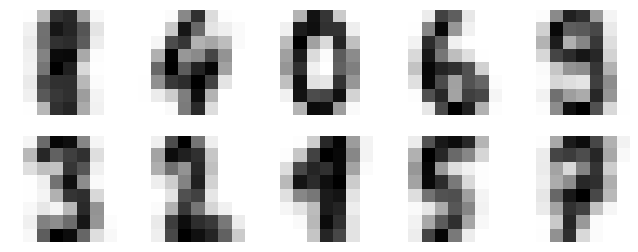

In [17]:
fig, ax = plt.subplots(2, 5, figsize=(8,3))

for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [20]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.79465776293823043

We see that KMeans is 80% correct in grouping the images

With the help of confusion_matrix we can get idea about where kmeans is finding hard time in grouping digits.

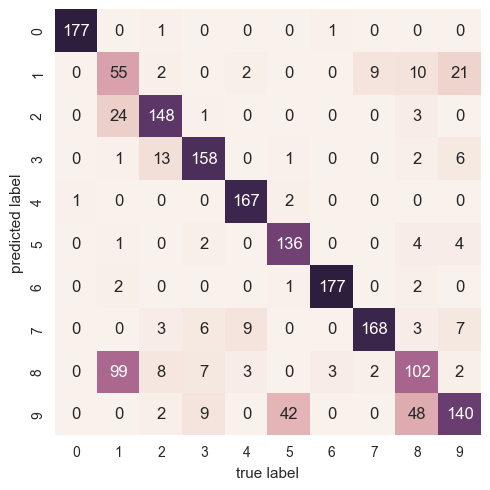

In [23]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(digits.target, labels)
sns.heatmap(conf_mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

We see that major confusion between 1 and 8.

0, 6 and 7 are grouped correclty most.

We can get better performance if tarnsform the data using
t-SNE(t-distributed stochastic nearest embedding). It basically
tries to keep the data in the cluster

#### Improvement Using t-SNE transformation on digits

In [24]:
from sklearn.manifold import TSNE

# Project the data: this step will take several seconds
tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# Compute the clusters
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# Permute the labels
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# Compute the accuracy
accuracy_score(digits.target, labels)

0.91930996104618812

We get pretty good improvement over Kmeans once we tranform the data using
t-SNE

We can see that some images are really complex that, even with human eyes,
It is prone to mistake.